In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../packages/")
import STE

## Symbolic Transfer Entropy

There are several techniques (e.g. mutual information, granger casuality) that can be used to detect *directed exchange of information* across the time-series. Here, we characterize the information flow between different time-series using the **Symbolic Transfer Entropy** (STE) [1]. **STE quantifies the directional flow of information between two time series, $X$ and $Y$ of length $N$, by first categorizing the signals in a small set of symbols or alphabet according to the pattern trends.** In [2] the authors have shown that the transfer entropy is equivalent to Granger causality for Gaussian processes. An advantage to use STE despite to Granger causality, is to capture non-linear causalities [3]. In the paper [3], the advantaged of STE over the Granger causality are analyzed. There are several techniques for estimating TE from observed data in order to apply it to real-world data problems. However, most of them require a large amount of data, and consequently, their results are commonly biased due to small-sample effects, which limits the use of TE in practical data applications. To avoid this problem, we use the robust and computationally fast technique of symbolization to estimate TE.

Let's now procede to convert the whole time-series (it could be useful not measuring the STE over time-series taken as a whole, but over sliding windows of length $w \ll L$) into a symbolic representation. A time-series is transformed into symbol sequences, for which an *embedding dimension* $3 \leq m \leq 7$ must be chosen. Let us consider a simple example of how this works. Imagine we have a signal:

$$X = \{120, 74, 203, 167, 92, 148, 174, 47\}$$

(let us ignore sliding windows $w$ by now). We shall transform this series into symbol series. For simplicity, let us suppose that the embedding dimension $m = 3$. This quantity determines the amount of symbols that can possibly exist, more precisely $m!$. See in the figure as an illustration of the possible symbols that can be obtained.

<img src="./images/STE.png" width="400">

The first step to transform $X$ into symbol sequences is to sort their subchains of length $m$ in increasing order. So, we take the first three elements of $X$ and sort them, which leaves us with $\{74, 120, 203\}$. We have kept tract of these values' indices, such that the sequence now looks like $\{2, 1, 3\}$. This first subchain maps to symbol $D$. From this scheme, we just need to advance one value at a time: the next subchain to consider is $\{74, 203, 167\}$. Its sorted version is $\{74, 167, 203\}$ which corresponds to $\{1, 3, 2\}$, and maps to $B$. And so on, until to achieve a symbol sequence $\hat{X} = \{D, B, F, E, A, C\}$. With a similar procedure, other series $Y$ are transormed into $\hat{Y}$. In our case, we consider directly the same permutations as symbols, for example the following permutations are derived by an embedding dimension $m = 3$: $\{(1, 2, 3): 0, (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)\}$. A way to interpret the meaning of $m$ is to think of it as the amount of *expressiveness* it allows to the original series. That is, if $m$ is low, a rich signal (one with many changes in it) is reduced to a small amount of possible symbols. An important feature of symbolic approaches is that they discount the relative magnitude of the time series; this is important in our case because different geographical units (our provinces) can differ largely in population density or other parameters. **Moreover, STE can successfully analyze time-series which may be short and/or non-stationary**. A drawback is that it considers only the order pattern of the time ù-series hence the information contained in the magnitude of the differences between amplitude values may not be taken into account. For example, $[1, 100, 2]$ and $[1, 3, 2]$ have the same permutation pattern $[0,2,1]$, but they vary greatly in size and tendency.

[1]. "Symbolic transfer entropy", M. Staniek and K. Lehnertz, 2008.

[2]. "Equivalence of granger causality and transfer entropy: A generalization", K. Schindlerova, 2011.

[3]. "Transfer entropy as a variable selection methodology of cryptocurrencies in the framework of a high dimensional predictive model", García-Medina, González Farías.

Given these symbol sequences, the transfer entropy between a pair of signals can be computed.

Let $\hat{x}_i = \hat{x}(i)$ and $\hat{y}_i = \hat{y}(i)$, $i = 1, ..., N$, denote sequences of observations from systems $\hat{X}$ and $\hat{Y}$ (symbolized time-series). *Transfer entropy*[1] incorporates time dependence by relating previous samples $\hat{x}_i$ and $\hat{y}_i$ to predict the next value $\hat{x}_{i+1}$, and quantifies the deviation from the Markov property, $p(\hat{x}_{i+1}|\hat{x}_i, \hat{y}_i) = p(\hat{x}_{i+1}|\hat{x}_i)$, where $p$ denotes the transition probability density. If there is no deviation from the Markov property, $\hat{Y}$ has no influence on $\hat{X}$. **Transfer entropy, which is formulated as Kullback-Leibler entropy between $p(\hat{x}_{i+1}|\hat{x}_i, \hat{y}_i)$ and $p(\hat{x}_{i+1}|\hat{x}_i)$, quantifies the incorrectness of this assumption**, and is explicitly non-symmetric under the exchange of $\hat{x}_i$ and $\hat{y}_i$. *The main convenience of such an information theoretic functional designed to detect causality is that, in principle, it does not assume any particular model for the interaction between the two systems of interest*.

Now, we can obtain the pairwise STE computing the joint and conditional probabilities of the sequence indices from the relative frequency of symbols in each sequence, $\hat{X}$ and $\hat{Y}$, using the Shannon transfer entropy:

$$ T_{XY} = \sum p(\hat{y}_{i+1}, \hat{y}_{i}, \hat{x}_{i}) log_2(\frac{p(\hat{y}_{i+1}| \hat{y}_{i}, \hat{x}_{i})}{p(\hat{y}_{i+1}| \hat{y}_{i})}) = \sum p(\hat{y}_{i+1}, \hat{y}_{i}, \hat{x}_{i}) log_2(\frac{p(\hat{y}_{i+1}, \hat{y}_{i}, \hat{x}_{i}) p(\hat{y}_i)}{p(\hat{y}_i, \hat{x}_i) p(\hat{y}_{i+1}, \hat{y}_{i})})$$

where the sum runs over each unique state of the sequences. $T_{XY}$ (or better $T_{X \rightarrow Y}$) **measures the information flow from $X$ to $Y$**. It is non-negative, and any information transfer between the two variables results in $0 \leq {T}_{XY} < \infty$. If the state $\hat{x}_{i}$ has no influence on the transition probabilities from $\hat{y}_{i}$ to $\hat{y}_{i+1}$, or if the two time series are completely synchronized, then ${T}_{XY} = 0$. The logarithm has base 2, so that the TE is measured in bits. For example if $T_{X, Y} = 0.624$ means that the history of the $X$ process has $0.624$ bits of additional information for predicting the next value of $Y$. (i.e., it provides information about the future of $Y$, in addition to what we know from the history of $Y$). Since it is non-zero, you can conclude that X influences Y in some way. There are actually two equations for the transfer entropy, because it has an inherent asymmetry in it:

$$ T_{YX} = \sum p(\hat{x}_{i+1}, \hat{x}_{i}, \hat{y}_{i}) log_2(\frac{p(\hat{x}_{i+1}, \hat{x}_{i}, \hat{y}_{i}) p(\hat{x}_i)}{p(\hat{x}_i, \hat{y}_i) p(\hat{x}_{i+1}, \hat{x}_{i})})$$

We can obtain the matrix $\{T_{XY}\}$, which contains pairwise information about how each component in the system controls (or is controlled by) the others. The matrix $\{T_{XY}\}$ is asymmetric. 

The transfer entropy in this "discrete" case can be derived using conditional Shannon entropies by expanding the logarithm:

$$T_{XY} = H(\hat{y}_{i+1}|\hat{y}_{i}) - H(\hat{y}_{i+1}|\hat{y}_{i}, \hat{x}_{i})$$

where $H(\hat{y}_{i+1}|\hat{y}_{i}) = -\sum p(\hat{y}_{i+1}, \hat{y}_{i}) log_2(p(\hat{y}_{i+1}| \hat{y}_{i}))$ is the entropy rate (a conditional Shannon entropy) and similarly $H(\hat{y}_{i+1}|\hat{y}_{i}, \hat{x}_{i})$ a generalised entropy rate. The entropy rate $H(\hat{y}_{i+1}|\hat{y}_{i})$ accounts for the average number of bits needed to encode one additional state of the system if the previous states is known, while the entropy rate $H(\hat{y}_{i+1}|\hat{y}_{i}, \hat{x}_{i})$ is the entropy rate capturing the average number of bits required to represent the value of the next destination’s state if source state is included in addition. Since one can always write [2]:

$$ H(\hat{y}_{i+1}|\hat{y}_{i}) = -\sum p(\hat{y}_{i+1}, \hat{y}_{i}) log_2(p(\hat{y}_{i+1}| \hat{y}_{i})) = -\sum p(\hat{y}_{i+1}, \hat{y}_{i}, \hat{x}_{i}) log_2(p(\hat{y}_{i+1}| \hat{y}_{i}))$$

it is easy to see that the entropy rate $H(\hat{y}_{i+1}|\hat{y}_{i})$ is equivalent to the rate $H(\hat{y}_{i+1}|\hat{y}_{i}, \hat{x}_{i})$ when the next state of destination is independent of the source:

$$p(\hat{y}_{i+1}|\hat{y}_{i}, \hat{x}_{i}) = p(\hat{y}_{i+1}|\hat{y}_{i})$$

Thus, in this case the transfer entropy reduces to zero.

We can also define a generalized Markov property $p(\hat{x}_{i+1}|\mathbf{\hat{x}_i^{(k_x)}}, \mathbf{\hat{y}_i^{(k_y)}}) = p(\hat{x}_{i+1}|\mathbf{\hat{x}_i^{(k_x)}})$ relying on the Kullback-Leibler distance, where $\mathbf{\hat{x}_i^{(k_x)}} = (\hat{x}_i, \hat{x}_{i - 1}, ..., \hat{x}_{i-(k_x-1)})$:

$$ T_{YX} = \sum p(\hat{x}_{i+1}, \mathbf{\hat{x}_{i}^{(k_x)}}, \mathbf{\hat{y}_{i}^{(k_y)}}) log_2(\frac{p(\hat{x}_{i+1}, \mathbf{\hat{x}_{i}^{(k_x)}}, \mathbf{\hat{y}_{i}^{(k_y)}}) p(\mathbf{\hat{x}_{i}^{(k_x)}})}{p(\mathbf{\hat{x}_{i}^{(k_x)}}, \mathbf{\hat{y}_{i}^{(k_y)}}) p(\hat{x}_{i+1}, \mathbf{\hat{x}_{i}^{(k_x)}})})$$

Also in this case, we can define the transfer entropy as the difference of these two conditional Shannon entropies:

$$T_{YX} = H(\hat{x}_{i+1}|\mathbf{\hat{x}_{i}^{(k_x)}}) - H(\hat{x}_{i+1}|\mathbf{\hat{x}_{i}^{(k_x)}}, \mathbf{\hat{y}_{i}^{(k_x)}})$$

In addition to these definitions, it is necessary to set a horizon prediction to the variable $X$ (or $Y$ depending on the case). This horizon indicates how far in the future of $X$ will be analyzed and is symbolized by the parameter $h$. Let $x_{i+h}$ denote the value of $X$ at time instant $i + h$, that is, $h$ steps in the future from $i$, and $h$ is referred to as the prediction horizon. That is if $h = 1$ the method will always verify only one sample ahead of the present, over the whole time analysis. Meaning that, assuming $i$ instants as the time reference. The method will check whether or not the past of $Y$ is influencing the behavior of the $X$ variable in time instant $i+1$.

$$ T_{YX} = \sum p(\hat{x}_{i+h}, \mathbf{\hat{x}_{i}^{(k_x)}}, \mathbf{\hat{y}_{i}^{(k_y)}}) log_2(\frac{p(\hat{x}_{i+h}, \mathbf{\hat{x}_{i}^{(k_x)}}, \mathbf{\hat{y}_{i}^{(k_y)}}) p(\mathbf{\hat{x}_{i}^{(k_x)}})}{p(\mathbf{\hat{x}_{i}^{(k_x)}}, \mathbf{\hat{y}_{i}^{(k_y)}}) p(\hat{x}_{i+h}, \mathbf{\hat{x}_{i}^{(k_x)}})})$$

where for $h = 1$ and $k_x = k_y = 1$ is equivalent to the standard form of the transfer entropy based on Markov property not generalized.

[1]. T.Schreiber, "Measuring information transfer", 2000.

[2]. "On Thermodynamic Interpretation of Transfer Entropy", Mikhail Prokopenko, Joseph T. Lizier and Don C. Price.

**The dominant direction of the information flow can be inferred by calculating the difference between $T_{YX}$ and $T_{XY}$**. It is convenient to define the directionality index $T_{XY}^{S} = T_{YX} - T_{XY}$, which measures the balance of information flow in both directions. **This index quantifies the dominant direction of information flow and is expected to have positive values for undirectional couplings with $x$ (x-axis) as driver and negative values if $y$ (y-axis) is driving $x$**. For symmetric bidirectional couplings, we expect $T_{XY}^{S}$ to be null. In this case the matrix is symmetric, for this reason I show only a side of the matrix.

Entropy, mutual information, and transfer entropy can be normalized with respect to the maximum possible entropy $H$ of a distribution where all states are equally probable, i.e., $H = log(m!)$, where $m$ is the embedding dimension used during the symbolic conversion. This normalization eliminates differences in entropy that are caused simply by the number of symbols used for discretization or the resolution of the partition, and renders a metric as a fraction of possible entropy or information from zero to one.

# Toy models

## Example 1

In [10]:
# Create the first time-series.
x = np.arange(0, 20, 0.01)
serie = np.sin(x)
serie = pd.Series(serie)

In [11]:
# Create the shifted time-series.
shift = 6
serie_shift = serie.shift(shift).dropna()

In [12]:
# Now, I have the two time-series where I see how x causes y.
y = serie_shift.reset_index(drop = True)
x = serie[shift:].reset_index(drop = True)

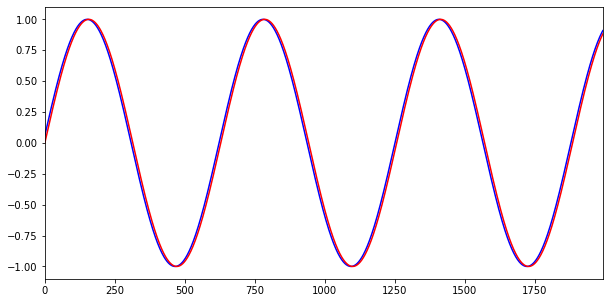

In [13]:
f = plt.figure(figsize = (10, 5))
x.plot(ax = f.gca(), c = "b"); 
y.plot(ax = f.gca(), c = "r");

In [14]:
# Find the optimal lag for the predictor X to predict Y.
lags = 40
TEs = list()
for k in range(lags):
    result = STE.calc_ste(x, y, m = 3, kx = k+1, ky = 1)
    TEs.append(result)

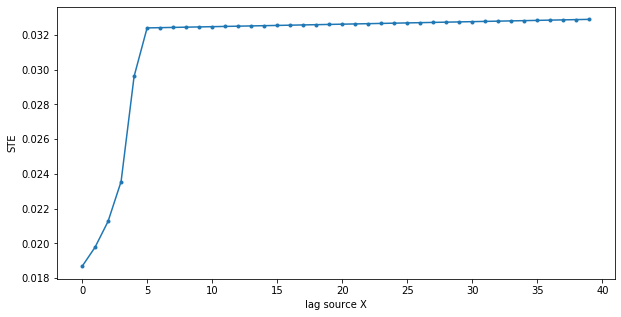

In [15]:
plt.figure(figsize = (10, 5))
plt.plot(TEs, ".-")
plt.xlabel("lag source X");
plt.ylabel("STE");

## Example 2

In [16]:
# Now, I have the two time-series where I see how x causes y.
y = serie_shift.reset_index(drop = True)
x = serie[shift:].reset_index(drop = True) + 4

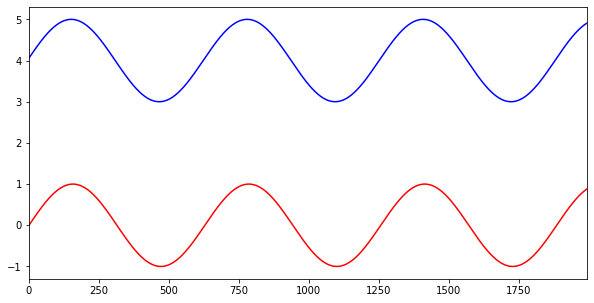

In [17]:
f = plt.figure(figsize = (10, 5))
x.plot(ax = f.gca(), c = "b"); 
y.plot(ax = f.gca(), c = "r");

In [19]:
# Find the optimal lag for the predictor X to predict Y.
lags = 40
TEs = list()
for k in range(lags):
    result = STE.calc_ste(x, y, m = 3, kx = k+1, ky = 1)
    TEs.append(result)

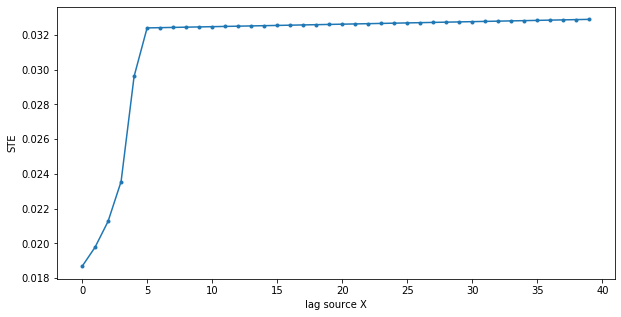

In [20]:
plt.figure(figsize = (10, 5))
plt.plot(TEs, ".-")
plt.xlabel("lag source X");
plt.ylabel("STE");

## Example 3

In [21]:
# Now, I have the two time-series where I see how x causes y.
y = serie_shift.reset_index(drop = True)
x = serie[shift:].reset_index(drop = True).values

for i in range(len(x)):
    if i > 0:
        x[i] = -x[i]
    if i < 0:
        x[i] = x[i]
        
x = pd.Series(x)

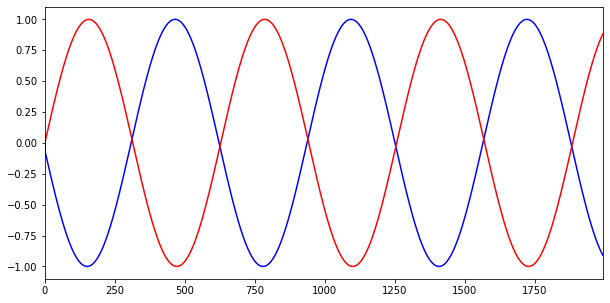

In [22]:
f = plt.figure(figsize = (10, 5))
x.plot(ax = f.gca(), c = "b"); 
y.plot(ax = f.gca(), c = "r");

In [23]:
# Find the optimal lag for the predictor X to predict Y.
lags = 40
TEs = list()
for k in range(lags):
    result = STE.calc_ste(x, y, m = 3, kx = k+1, ky = 1)
    TEs.append(result)

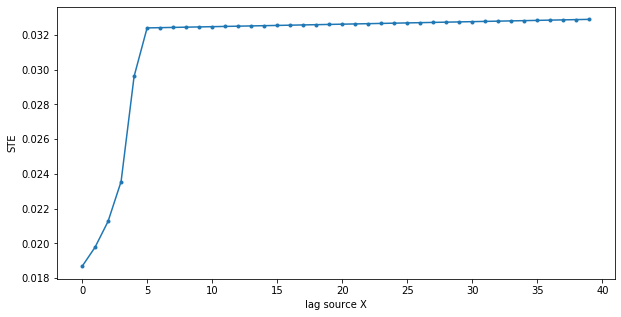

In [24]:
plt.figure(figsize = (10, 5))
plt.plot(TEs, ".-")
plt.xlabel("lag source X");
plt.ylabel("STE");

## Example 4

In [25]:
y = serie_shift.reset_index(drop = True)
x = serie[shift:].reset_index(drop = True)

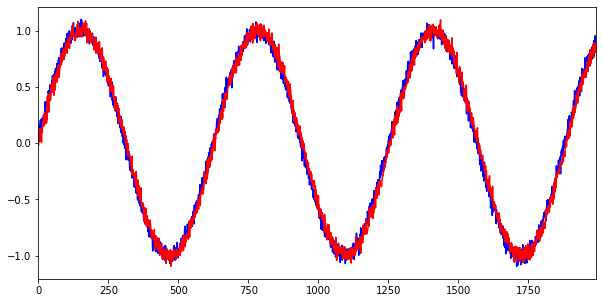

In [26]:
# If I add noise the algorithm not work well.
from tsaug import AddNoise

# AddNoise.
my_augmenter = (AddNoise(scale = 0.02) @ 1)
x_noise = pd.Series(my_augmenter.augment(x.values))
y_noise = pd.Series(my_augmenter.augment(y.values))

f = plt.figure(figsize = (10, 5))
x_noise.plot(ax = f.gca(), c = "b");
y_noise.plot(ax = f.gca(), c = "r");

In [27]:
# Find the optimal lag for the predictor X to predict Y.
lags = 40
TEs = list()
for k in range(lags):
    result = STE.calc_ste(x_noise, y_noise, m = 3, kx = k+1, ky = 1)
    TEs.append(result)

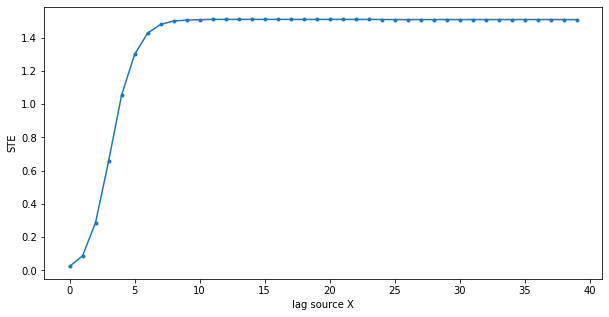

In [28]:
plt.figure(figsize = (10, 5))
plt.plot(TEs, ".-")
plt.xlabel("lag source X");
plt.ylabel("STE");